# Project #1 - Exploratory data analysis

## Import used packages

In [73]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from datetime import date, datetime


## Loading data from - in our case it is a csv file

In [74]:
df_full = pd.read_csv('./googleplaystore.csv', sep=',')

## Let's take a look at the basic dataset information

### Dataset shape?
- 13 cols, 10841 rows


### Dataset cols names with datatypes?

In [75]:
df_full.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### It would be better to edit and convert columns to correct datatypes
- Price has dollar sign before value, it would be better to remove dollar sign and convert into numeric value
- Last Updated is object, maybe it will be better to use datetime
- Reviews should be integer
- Created new col Size Numeric, M and k units removed and k calculated to M 

In [76]:
# there was a one incorrect record, cells was wrongly sorted
df_full = df_full.loc[df_full['App'] !=
                      'Life Made WI-Fi Touchscreen Photo Frame']

df_full['Price'] = df_full['Price'].str.replace(
    '$', '', regex=True).astype(float)

df_full['Last Updated'] = pd.to_datetime(
    df_full['Last Updated'], format='%B %d, %Y')

df_full['Reviews'] = pd.to_numeric(df_full["Reviews"])

df_full['Size Numeric'] = df_full['Size'].apply(lambda x: round(float(x.replace('k', '')) / 1024, 1) if 'k' in x else x.replace('M', ''))
df_full['Size Numeric'] = df_full['Size Numeric'].loc[df_full['Size Numeric'] != 'Varies with device'].astype(float)


### Are there any missing values?
- Mostly not, a few columns have negligibly few missing values
- Rating has cca 1/11 of records empty

In [77]:
df_full.isna().sum().sort_values()

App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Type                 1
Android Ver          2
Current Ver          8
Rating            1474
Size Numeric      1695
dtype: int64

### Removing records without value
- Since the dataset is large enough and the data are not dependent on each other, I choose the option that deletes records without value

In [78]:
df_full = df_full.dropna()

## Now let's write down a few unknowns we wanna find out
1. Count of apps for each category
2. Count of apps for each Content rating (Age group the app is targeted at)
3. Count of apps for Installs number category
4. Which Content rating has the highest rating?
5. Are all applications correctly maintened?
6. How are the apps mostly rated, free/paid?
7. Let's check correlation between numeric values

### 1. Count of apps for each category
- Category named family has the highest number of applications (almost 1750)
- The games category has the second highest number of applications, third is tools category
- The other categories have significantly fewer applications than the 3 mentioned above
- Beauty, Events, Parenting are the categories with the lowest frequency 


<AxesSubplot: xlabel='Count of apps', ylabel='Category'>

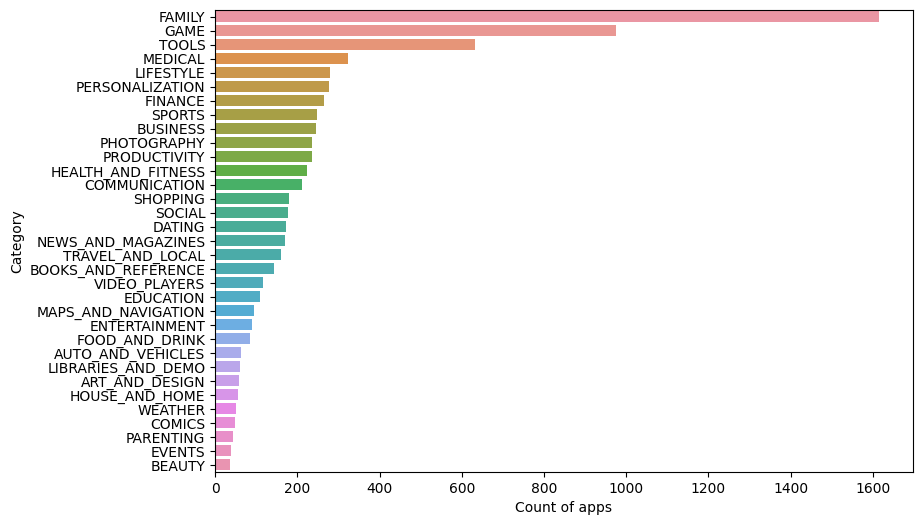

In [79]:
df_one = df_full.groupby('Category').App.count().sort_values(ascending=False).reset_index(name="Count of apps")
fig = plt.figure(figsize=(9, 6))

sns.barplot(data=df_one, x='Count of apps', y='Category')

### 2. Count of apps for each Content rating (Age group the app is targeted at)
- We can see that applications are mostly targeted at Everyone, age doesn't matter
- Second highest number has Teen Content Rating
- Everyone 10+ and Mature 17+ Content Ratings have similar number of applications
- 18+ has only 3 apps and Unrated 1

    Content Rating  Count of apps
0  Adults only 18+              2
1         Everyone           6166
2     Everyone 10+            318
3       Mature 17+            368
4             Teen            868
5          Unrated              1


<AxesSubplot: xlabel='Content Rating', ylabel='Count of apps'>

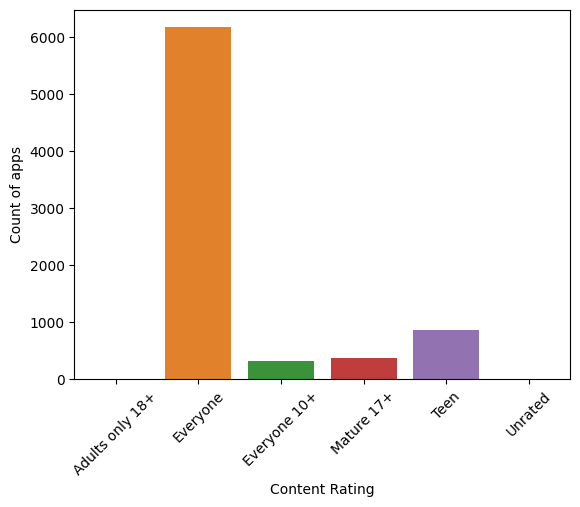

In [80]:
df_three = df_full.groupby('Content Rating').App.count().reset_index(name="Count of apps")

print(df_three)

plt.xticks(rotation=45)
sns.barplot(data=df_three, y='Count of apps', x='Content Rating')

### 3. Count of apps for Installs number category
- Apps most often have 1,000,000+ installs
- 1,000,000,000+ installs have only few apps, cca 50




<AxesSubplot: xlabel='Count of apps', ylabel='Installs'>

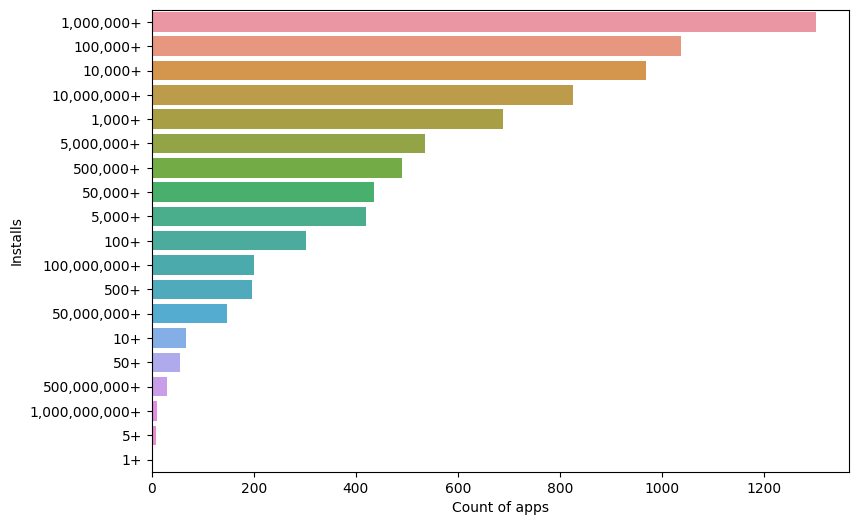

In [81]:
df_three = df_full.groupby('Installs').App.count().sort_values(ascending=False).reset_index(name="Count of apps")
fig = plt.figure(figsize=(9, 6))

sns.barplot(data=df_three, x='Count of apps', y='Installs')

### 4. Which Content rating has the highest rating?
- it can be seen that apps for everyone the most dispersed rating
- apps for everyone are the only Content Rating which contains rating under 3.0 points




<AxesSubplot: xlabel='Rating', ylabel='Content Rating'>

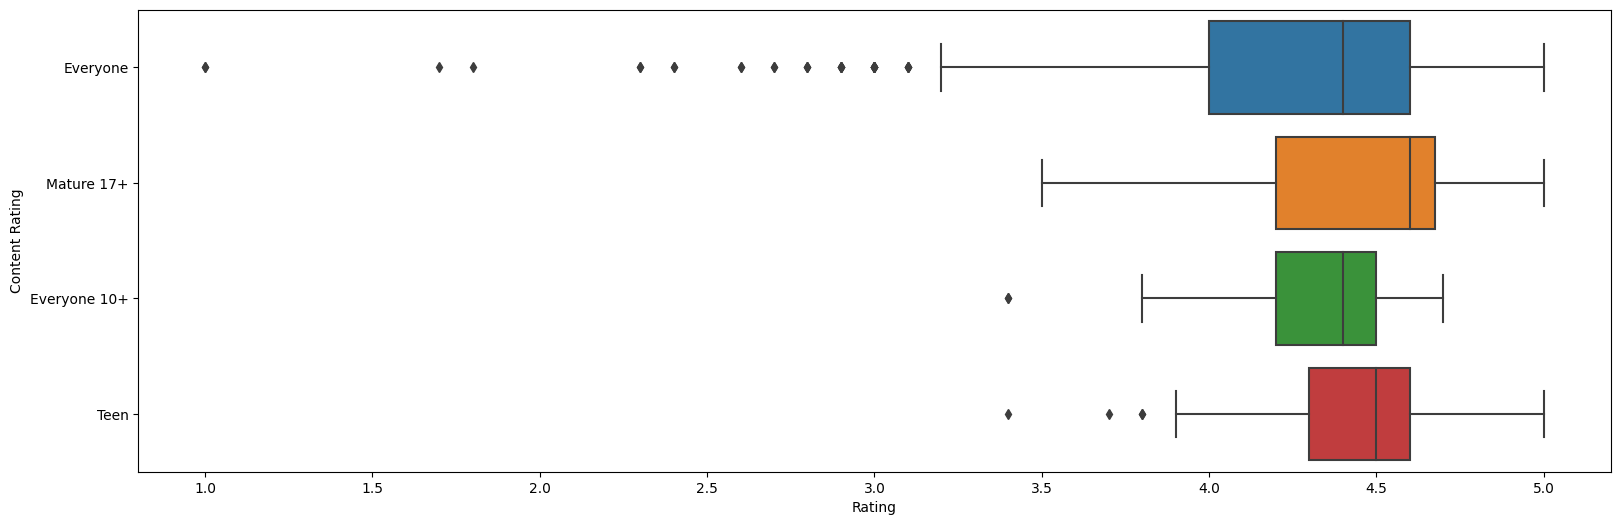

In [82]:
fix = plt.figure(figsize=(19,6))
sns.boxplot(data=df_full.loc[df_full['Price'] > 0], y='Content Rating', x='Rating')

### 5. Are all applications correctly maintened?
- We can see that some applications are no longer maintained

<AxesSubplot: xlabel='Last Updated Year', ylabel='Count of apps'>

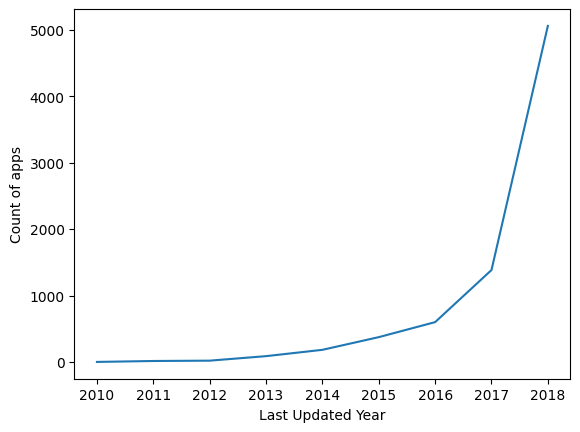

In [83]:
# first of all, let's create new column with year
df_full['Last Updated Year'] = pd.to_datetime(df_full['Last Updated']).dt.year
df_five = df_full.groupby('Last Updated Year').App.count().reset_index(name='Count of apps')
sns.lineplot(data=df_five, x='Last Updated Year', y='Count of apps')

### 6. How are the apps mostly rated, free/paid?
- It's obvious, that there is more free apps 
- Apps are mostly rated from 4.0 to 4.8 points

<AxesSubplot: xlabel='Rating', ylabel='Count'>

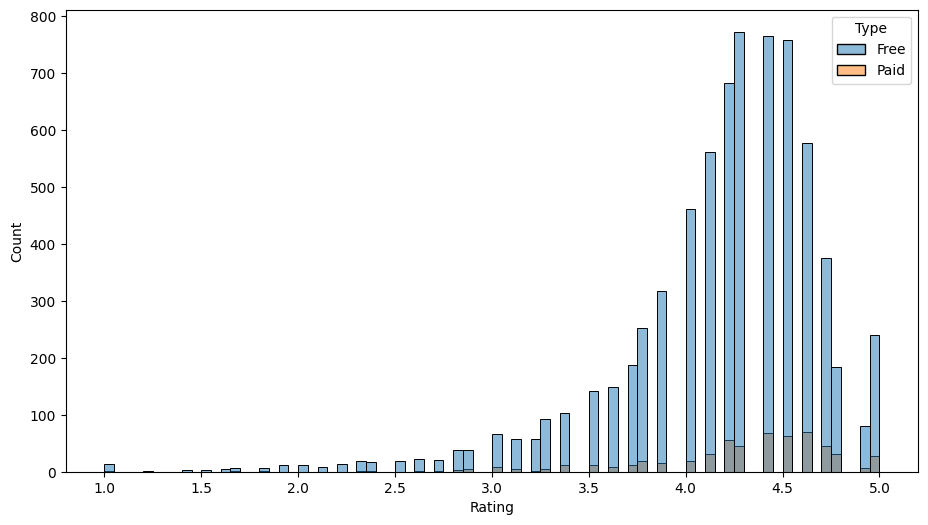

In [84]:
fig = plt.figure(figsize=((11,6)))
sns.histplot(data=df_full, x='Rating', hue='Type')

### 7. Relation between category and price
- From commented row we know that the most expensive apps are in category finance and lifestyle
- I've filtered these extreme values for better visualisation
- Now we can see prices for each category
    - Medical apps has the most expensive app after filtering
    - Typical price is between 2 and 5 dollars

<AxesSubplot: xlabel='Price', ylabel='Category'>

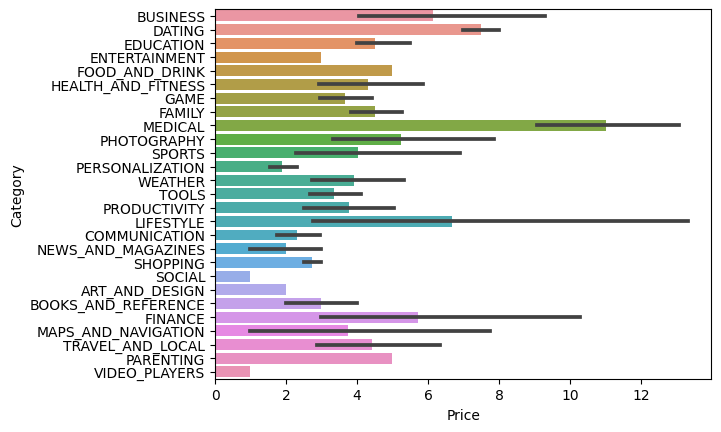

In [85]:
# sns.barplot(data=df_full.loc[(df_full['Price'] > 0) ],y='Category', x='Price')
sns.barplot(data=df_full.loc[(df_full['Price'] > 0) & (df_full['Price'] < 50)], y='Category', x='Price')

### 8. Let's check correlation between numeric values
- We can see that correlation between selected values is not that strong
- Highest correlation is between Rating and Last Updated Year

<AxesSubplot: >

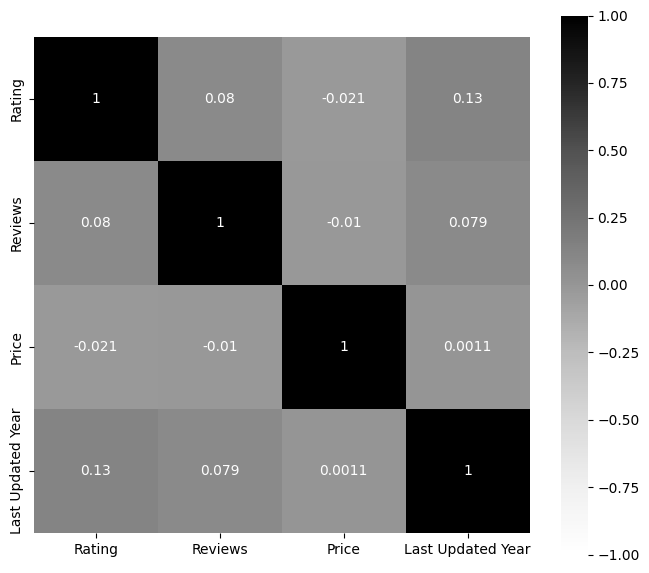

In [86]:
plt.figure(figsize=(8, 7))
df_numeric = df_full[['Rating', 'Reviews', 'Price', 'Last Updated Year']]
sns.heatmap(df_numeric.corr(), square=True, cmap='Greys', vmin=-1, vmax=1, annot=True)

<AxesSubplot: xlabel='Category', ylabel='Size Numeric'>

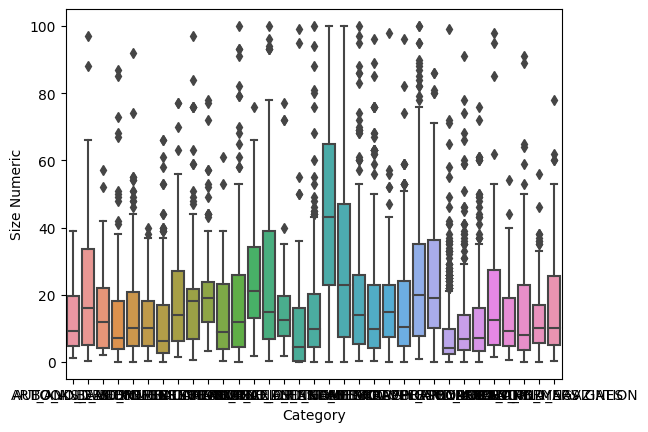

In [90]:

sns.boxplot(data=df_full, x='Category', y='Size Numeric')